# Operations on Tweets Dataset

Implement the following operations on Tweets dataset using NLTK libraries
1. Data Cleaning
2. Rank most frequently occurring 15 n-grams (bigrams and trigrams) in the given tweets dataset.
3. Visualize most frequently occurring 15 n-grams(bigram and trigrams) in the given tweets dataset.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')

/tmp/ipykernel_9376/3067037011.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package wordnet to /home/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/student/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('../Resources/ngram_tweets.csv', usecols=['text'])
df.head()

,text
0,LOSER! https://t.co/p5imhMJqS1
1,Most of the money raised by the RINO losers of...
2,....because they don’t know how to win and the...
3,....lost for Evan “McMuffin” McMullin (to me)....
4,....get even for all of their many failures. Y...


## Data Cleaning

In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [5]:
lem = WordNetLemmatizer()
sw = stopwords.words('english')
words = df['text'].to_list()
words = " ".join(i.lower() for i in words)
words = re.sub('[^\w\s]', '', words).split()
words = [lem.lemmatize(i) for i in words if i not in sw]
words

['loser',
 'httpstcop5imhmjqs1',
 'money',
 'raised',
 'rino',
 'loser',
 'socalled',
 'lincoln',
 'project',
 'go',
 'pocket',
 'ive',
 'done',
 'judge',
 'tax',
 'regulation',
 'healthcare',
 'military',
 'vet',
 'choice',
 'amp',
 'protecting',
 'great',
 '2a',
 'love',
 'trump',
 'problem',
 'beat',
 'dont',
 'know',
 'win',
 'socalled',
 'lincoln',
 'project',
 'disgrace',
 'honest',
 'abe',
 'dont',
 'know',
 'kellyanne',
 'deranged',
 'loser',
 'husband',
 'moonface',
 'must',
 'really',
 'bad',
 'john',
 'weaver',
 'lost',
 'big',
 'kasich',
 'crazed',
 'rick',
 'wilson',
 'lost',
 'evan',
 'mcmuffin',
 'mcmullin',
 'steve',
 'schmidt',
 'amp',
 'reed',
 'galvin',
 'lost',
 'john',
 'mccain',
 'romneys',
 'campaign',
 'manager',
 'lost',
 'big',
 'amp',
 'jennifer',
 'horn',
 'got',
 'thrown',
 'new',
 'hampshire',
 'republican',
 'party',
 'theyre',
 'loser',
 'abe',
 'lincoln',
 'republican',
 'smile',
 'get',
 'even',
 'many',
 'failure',
 'see',
 'loser',
 'type',
 'dont',


## Rank and visualize most frequently occurring 15 n-grams

In [6]:
import matplotlib.pyplot as plt
def graph(k):
    ngram = nltk.ngrams(words, k)
    sr = pd.Series(ngram).value_counts()
    print(sr[:15])
    sr[:15].plot.bar()
    plt.title('15 Most Freq. Occuring for k = '+str(k))
    plt.ylabel('No. Of occurrances')
    plt.xlabel('n_gram')
    plt.show()
    

(hater, amp, loser)             10
(separate, winner, loser)        8
(new, twist, fate)               6
(reacts, new, twist)             6
(person, reacts, new)            6
(loser, person, reacts)          6
(winner, loser, person)          6
(hater, loser, happy)            6
(ego, ill, show)                 5
(ill, show, loser)               5
(including, hater, loser)        5
(everyone, including, hater)     5
(without, ego, ill)              5
(stone, cold, loser)             4
(trying, mike, ditka)            4
Name: count, dtype: int64


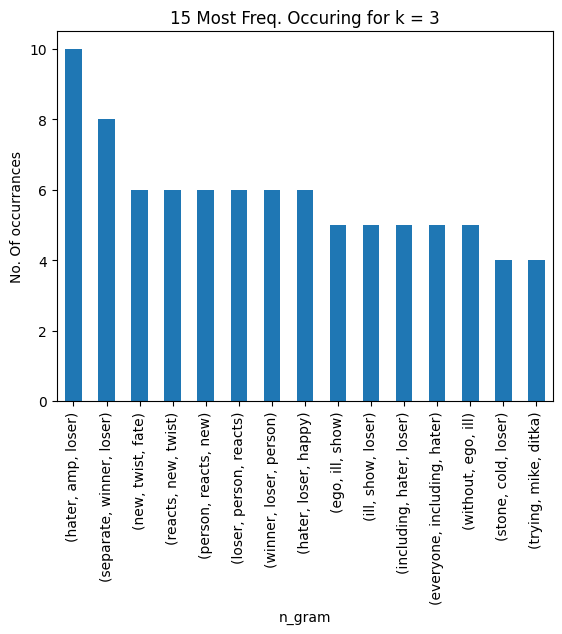

In [7]:
graph(3)